In [55]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [56]:
iris = datasets.load_iris()
X = iris.data[:,[0,1]]
y = iris.target

In [57]:
def Remocion(X_train, X_test):
    # almacenamos los parametros de entrenamiento
    X_train_mean = X_train.mean(axis = 0)
    X_train_std = X_train.std(axis = 0)
    #aplicamos el preprocesamiento
    X_train = (X_train - X_train_mean)/X_train_std
    X_test = (X_test - X_train_mean)/X_train_std
    return X_train,X_test

In [58]:
def Escalamiento(X_train, X_test):
    X_train = (X_train - X_train.min(axis = 0))/(X_train.max(axis = 0) - X_train.min(axis = 0))
    X_test = (X_test - X_test.min(axis = 0))/(X_test.max(axis = 0) - X_test.min(axis = 0))
    return X_train,X_test

In [59]:
def Norma(X_train, X_test, orden):
    norma = np.linalg.norm(X_train, ord = orden, axis = 1) #Calulo de la norma por observacion(axis=1)
    #para hacer las operaciones, debemos hacer una matriz de normas
    norma = np.repeat(norma, X_train.shape[1]) #Repite la norma 3 veces
    norma = np.resize(norma, X_train.shape) #La convierte en una matriz de 4x3

    test = np.repeat(norma, X_test.shape[1])
    test = np.resize(norma, X_test.shape)
    #Division elemento a elemento
    X_train = X_train/norma
    X_test = X_test/test
    return X_train, X_test

In [60]:
def visualizar_clasificador(clasificador, X, y):
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    #definimos el paso de la malla
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    print(resultados)
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Paired)
    #ubicamos los puntos
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

matrices = [Remocion(X_train,X_test),Escalamiento(X_train,X_test), Norma(X_train, X_test, 1), Norma(X_train, X_test, 2)]
print(len(y_train))

105


105
105
[1 1 1 ..., 2 2 2]


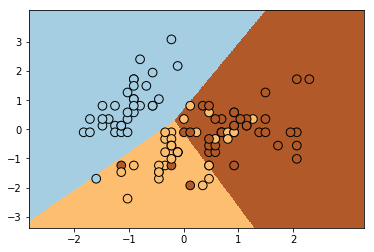

In [62]:
clasificador = LogisticRegression(C=Cs[4], random_state=0)
print(len(matrices[0][0]))
print(len(y_train))
matrix = matrices[0][0]
clasificador.fit(matrices[0][0],y_train)
visualizar_clasificador(clasificador,matrix,y_train)
    

[1 1 1 ..., 2 2 2]


RESULTADOS CON C=0.001
Las muestras mal clasificadas fueron 15
El porcentaje de acierto de clasificacion fue 66.6666666667
[1 1 1 ..., 2 2 2]


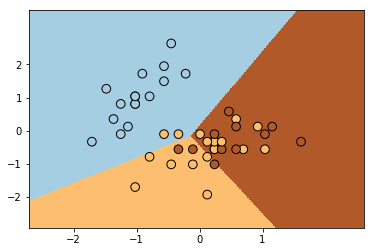

RESULTADOS CON C=0.01
Las muestras mal clasificadas fueron 15
El porcentaje de acierto de clasificacion fue 66.6666666667
[1 1 1 ..., 2 2 2]


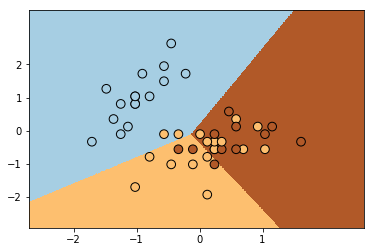

RESULTADOS CON C=0.1
Las muestras mal clasificadas fueron 15
El porcentaje de acierto de clasificacion fue 66.6666666667
[1 1 1 ..., 2 2 2]


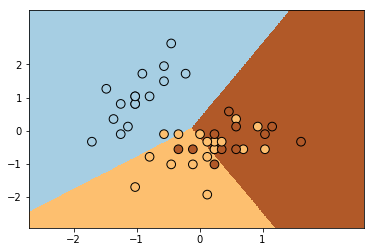

RESULTADOS CON C=1
Las muestras mal clasificadas fueron 15
El porcentaje de acierto de clasificacion fue 66.6666666667
[0 0 0 ..., 2 2 2]


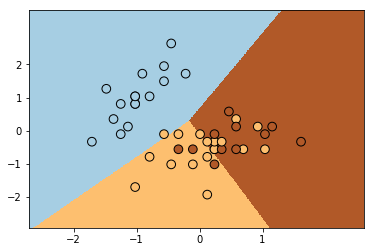

RESULTADOS CON C=10
Las muestras mal clasificadas fueron 14
El porcentaje de acierto de clasificacion fue 68.8888888889
[0 0 0 ..., 2 2 2]


RESULTADOS CON C=100
Las muestras mal clasificadas fueron 12
El porcentaje de acierto de clasificacion fue 73.3333333333
[0 0 0 ..., 2 2 2]


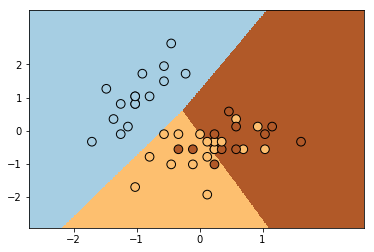

RESULTADOS CON C=1000
Las muestras mal clasificadas fueron 12
El porcentaje de acierto de clasificacion fue 73.3333333333
[0 0 0 ..., 2 2 2]


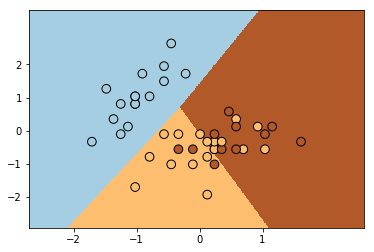

RESULTADOS CON C=10000
Las muestras mal clasificadas fueron 12
El porcentaje de acierto de clasificacion fue 73.3333333333
[0 0 0 ..., 2 2 2]


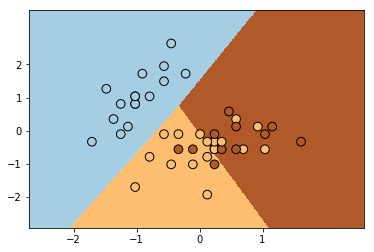

RESULTADOS CON C=100000
Las muestras mal clasificadas fueron 12
El porcentaje de acierto de clasificacion fue 73.3333333333
[0 0 0 ..., 2 2 2]


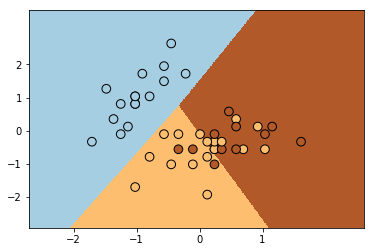

RESULTADOS CON C=1000000
Las muestras mal clasificadas fueron 12
El porcentaje de acierto de clasificacion fue 73.3333333333
[0 0 0 ..., 2 2 2]


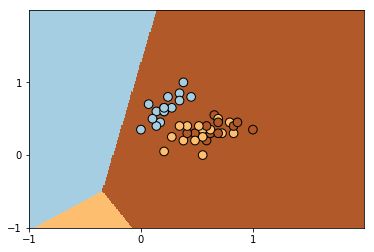

RESULTADOS CON C=0.001
Las muestras mal clasificadas fueron 34
El porcentaje de acierto de clasificacion fue 24.4444444444
[0 0 0 ..., 2 2 2]


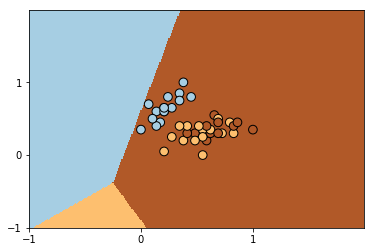

RESULTADOS CON C=0.01
Las muestras mal clasificadas fueron 34
El porcentaje de acierto de clasificacion fue 24.4444444444
[1 1 1 ..., 2 2 2]


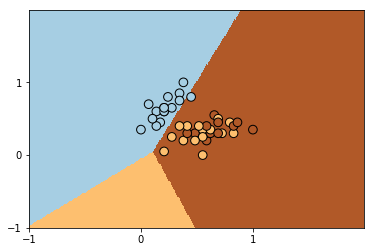

RESULTADOS CON C=0.1
Las muestras mal clasificadas fueron 19
El porcentaje de acierto de clasificacion fue 57.7777777778
[1 1 1 ..., 2 2 2]


RESULTADOS CON C=1
Las muestras mal clasificadas fueron 15
El porcentaje de acierto de clasificacion fue 66.6666666667
[1 1 1 ..., 2 2 2]


RESULTADOS CON C=10
Las muestras mal clasificadas fueron 13
El porcentaje de acierto de clasificacion fue 71.1111111111
[1 1 1 ..., 2 2 2]


RESULTADOS CON C=100
Las muestras mal clasificadas fueron 13
El porcentaje de acierto de clasificacion fue 71.1111111111
[0 0 0 ..., 2 2 2]


RESULTADOS CON C=1000
Las muestras mal clasificadas fueron 13
El porcentaje de acierto de clasificacion fue 71.1111111111
[0 0 0 ..., 2 2 2]


RESULTADOS CON C=10000
Las muestras mal clasificadas fueron 13
El porcentaje de acierto de clasificacion fue 71.1111111111
[0 0 0 ..., 2 2 2]


RESULTADOS CON C=100000
Las muestras mal clasificadas fueron 13
El porcentaje de acierto de clasificacion fue 71.1111111111
[0 0 0 ..., 2 2 2]


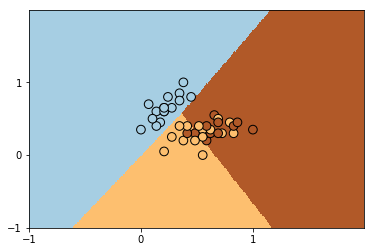

RESULTADOS CON C=1000000
Las muestras mal clasificadas fueron 13
El porcentaje de acierto de clasificacion fue 71.1111111111
[2 2 2 ..., 2 2 2]


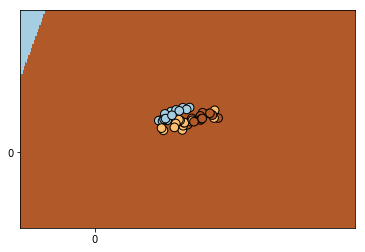

RESULTADOS CON C=0.001
Las muestras mal clasificadas fueron 34
El porcentaje de acierto de clasificacion fue 24.4444444444
[2 2 2 ..., 2 2 2]


RESULTADOS CON C=0.01
Las muestras mal clasificadas fueron 34
El porcentaje de acierto de clasificacion fue 24.4444444444
[2 2 2 ..., 2 2 2]


RESULTADOS CON C=0.1
Las muestras mal clasificadas fueron 34
El porcentaje de acierto de clasificacion fue 24.4444444444
[2 2 2 ..., 2 2 2]


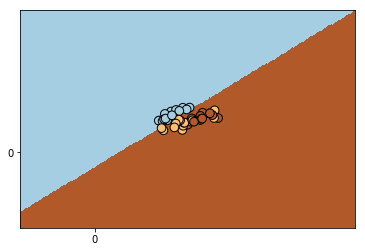

RESULTADOS CON C=1
Las muestras mal clasificadas fueron 18
El porcentaje de acierto de clasificacion fue 60.0
[2 2 2 ..., 0 0 0]


RESULTADOS CON C=10
Las muestras mal clasificadas fueron 18
El porcentaje de acierto de clasificacion fue 60.0
[2 2 2 ..., 0 0 0]


RESULTADOS CON C=100
Las muestras mal clasificadas fueron 18
El porcentaje de acierto de clasificacion fue 60.0
[2 2 2 ..., 0 0 0]


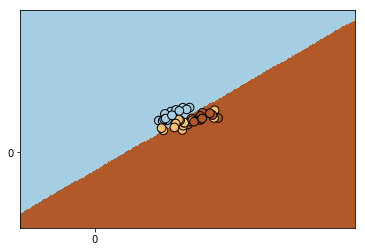

RESULTADOS CON C=1000
Las muestras mal clasificadas fueron 17
El porcentaje de acierto de clasificacion fue 62.2222222222
[2 2 2 ..., 0 0 0]


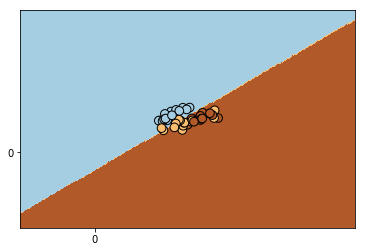

RESULTADOS CON C=10000
Las muestras mal clasificadas fueron 16
El porcentaje de acierto de clasificacion fue 64.4444444444
[2 2 2 ..., 0 0 0]


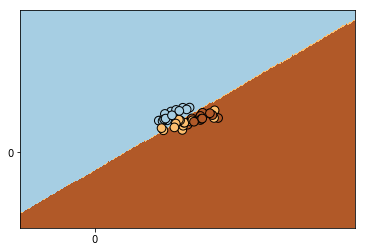

RESULTADOS CON C=100000
Las muestras mal clasificadas fueron 15
El porcentaje de acierto de clasificacion fue 66.6666666667
[2 2 2 ..., 0 0 0]


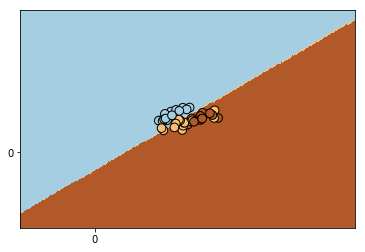

RESULTADOS CON C=1000000
Las muestras mal clasificadas fueron 15
El porcentaje de acierto de clasificacion fue 66.6666666667
[2 2 2 ..., 2 2 2]


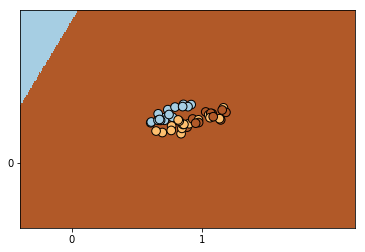

RESULTADOS CON C=0.001
Las muestras mal clasificadas fueron 34
El porcentaje de acierto de clasificacion fue 24.4444444444
[2 2 2 ..., 2 2 2]


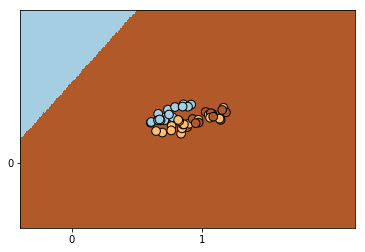

RESULTADOS CON C=0.01
Las muestras mal clasificadas fueron 34
El porcentaje de acierto de clasificacion fue 24.4444444444
[2 2 2 ..., 2 2 2]


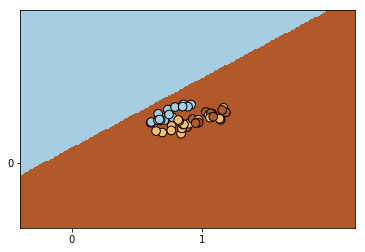

RESULTADOS CON C=0.1
Las muestras mal clasificadas fueron 34
El porcentaje de acierto de clasificacion fue 24.4444444444
[2 2 2 ..., 0 0 0]


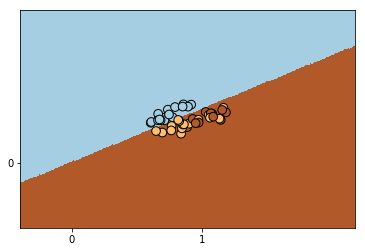

RESULTADOS CON C=1
Las muestras mal clasificadas fueron 18
El porcentaje de acierto de clasificacion fue 60.0
[2 2 2 ..., 0 0 0]


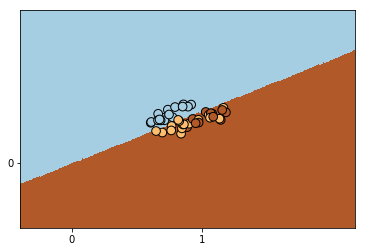

RESULTADOS CON C=10
Las muestras mal clasificadas fueron 18
El porcentaje de acierto de clasificacion fue 60.0
[2 2 2 ..., 0 0 0]


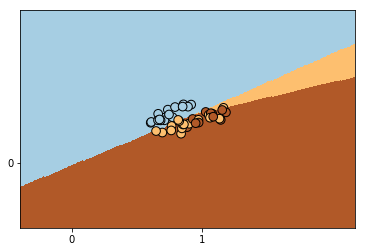

RESULTADOS CON C=100
Las muestras mal clasificadas fueron 18
El porcentaje de acierto de clasificacion fue 60.0
[2 2 2 ..., 1 1 1]


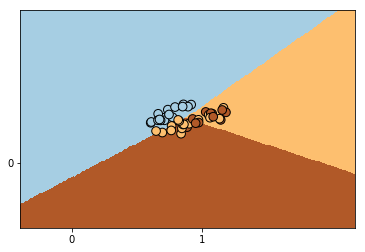

RESULTADOS CON C=1000
Las muestras mal clasificadas fueron 21
El porcentaje de acierto de clasificacion fue 53.3333333333
[0 0 0 ..., 1 1 1]


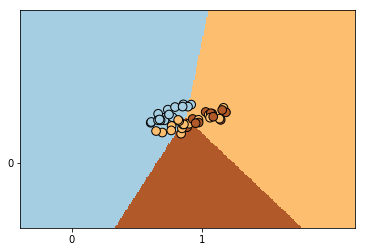

RESULTADOS CON C=10000
Las muestras mal clasificadas fueron 23
El porcentaje de acierto de clasificacion fue 48.8888888889
[0 0 0 ..., 1 1 1]


RESULTADOS CON C=100000
Las muestras mal clasificadas fueron 25
El porcentaje de acierto de clasificacion fue 44.4444444444
[0 0 0 ..., 1 1 1]


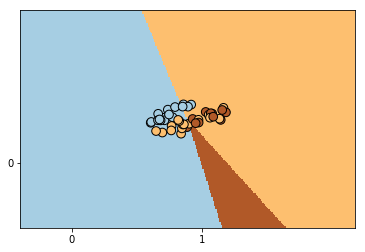

RESULTADOS CON C=1000000
Las muestras mal clasificadas fueron 27
El porcentaje de acierto de clasificacion fue 40.0


In [63]:
for X_train_norm, X_test_norm in matrices:
    for c in Cs:
        clasificador = LogisticRegression(C=c, random_state=0)    
        clasificador.fit(X_train_norm, y_train)
        visualizar_clasificador(clasificador,X_test_norm,y_test)
        y_pred = clasificador.predict(X_test_norm)
        mal_clasificadas = (y_test != y_pred).sum()
        porc_acierto = (100-((y_test != y_pred).sum()/45)*100)
        print('RESULTADOS CON C=%s' % c)
        print('Las muestras mal clasificadas fueron %d' % mal_clasificadas)
        print('El porcentaje de acierto de clasificacion fue %s' % porc_acierto)
        
        
  